In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pickle
from tensorflow import keras
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import regularizers
from sklearn.preprocessing import StandardScaler

In [151]:
# Read the CSV file
data_train = pd.read_csv('./train_data_shuffled_prime.csv')  
data_test = pd.read_csv('./test_data_shuffled_prime.csv')

# Extract the input and output columns
input_data_train = data_train.iloc[:, 0].values
output_data_train = data_train.iloc[:, 1].values

input_data_test = data_test.iloc[:, 0].values
output_data_test = data_test.iloc[:, 1].values

# Reshape the input and output arrays if necessary
input_data_train = input_data_train.reshape(-1, 1)  # Shape: (num_samples, 1)
output_data_train = output_data_train.reshape(-1, 1)  # Shape: (num_samples, 1)

input_data_test = input_data_test.reshape(-1, 1)  # Shape: (num_samples, 1)
output_data_test = output_data_test.reshape(-1, 1)  # Shape: (num_samples, 1)

train_input = input_data_train
train_output = output_data_train

test_input = input_data_test
test_output = output_data_test


# Create a StandardScaler object
#scaler = StandardScaler()

# Fit the scaler on the training data and transform it
#train_input_scaled = scaler.fit_transform(train_input)

# Transform the test data using the same scaler
#test_input_scaled = scaler.transform(test_input)


# Build the neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='tanh', input_shape=(1,), kernel_initializer='glorot_normal'),
    keras.layers.Dense(128, activation='sigmoid', kernel_initializer='glorot_normal'),
    keras.layers.Dense(128, activation='sigmoid', kernel_initializer='glorot_normal'),
    keras.layers.Dense(64, activation='tanh', kernel_initializer='glorot_normal'),
    keras.layers.Dense(1)
])

# Create the optimizer
optimizer = keras.optimizers.Adam(learning_rate = 0.001)

# Compile the model
model.compile(optimizer=optimizer, loss='mse')

# Train the model
epochs = 100  # Number of training iterations
batch_size = 32  # Number of samples per gradient update

# Create a learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)

# Add the scheduler to the callbacks list
callbacks = [lr_scheduler]

history = model.fit(train_input, train_output, epochs=epochs, batch_size=batch_size, callbacks=callbacks, validation_split=0.1)

# Evaluate the model
loss = model.evaluate(test_input, test_output)
print("Test loss:", loss)

# Make predictions using the trained model
predictions = model.predict(test_input)

with open("var.pickle", "wb") as f:
    pickle.dump((loss, predictions), f)

Epoch 1/100
28125/28125 [==============================] - 58s 2ms/step - loss: 0.0060 - val_loss: 0.0067 - lr: 0.0010
Epoch 2/100
28125/28125 [==============================] - 60s 2ms/step - loss: 0.0059 - val_loss: 0.0057 - lr: 0.0010
Epoch 3/100
28125/28125 [==============================] - 60s 2ms/step - loss: 0.0059 - val_loss: 0.0058 - lr: 0.0010
Epoch 4/100
28125/28125 [==============================] - 60s 2ms/step - loss: 0.0059 - val_loss: 0.0065 - lr: 0.0010
Epoch 5/100
28125/28125 [==============================] - 60s 2ms/step - loss: 0.0059 - val_loss: 0.0057 - lr: 0.0010
Epoch 6/100
28125/28125 [==============================] - 60s 2ms/step - loss: 0.0058 - val_loss: 0.0061 - lr: 5.0000e-04
Epoch 7/100
28125/28125 [==============================] - 59s 2ms/step - loss: 0.0058 - val_loss: 0.0057 - lr: 5.0000e-04
Epoch 8/100
28125/28125 [==============================] - 59s 2ms/step - loss: 0.0058 - val_loss: 0.0061 - lr: 5.0000e-04
Epoch 9/100
28125/28125 [===========

In [152]:
# Read the CSV file
data_train = pd.read_csv('./train_data_shuffled_prime.csv')  
data_test = pd.read_csv('./test_data_shuffled_prime.csv')

# Extract the input and output columns
input_data_train = data_train.iloc[:, 0].values
output_data_train = data_train.iloc[:, 1].values

input_data_test = data_test.iloc[:, 0].values
output_data_test = data_test.iloc[:, 1].values

# Reshape the input and output arrays if necessary
input_data_train = input_data_train.reshape(-1, 1)  # Shape: (num_samples, 1)
output_data_train = output_data_train.reshape(-1, 1)  # Shape: (num_samples, 1)

input_data_test = input_data_test.reshape(-1, 1)  # Shape: (num_samples, 1)
output_data_test = output_data_test.reshape(-1, 1)  # Shape: (num_samples, 1)

train_input = input_data_train
train_output = output_data_train

test_input = input_data_test
test_output = output_data_test


# Create a StandardScaler object
#scaler = StandardScaler()

# Fit the scaler on the training data and transform it
#train_input_scaled = scaler.fit_transform(train_input)

# Transform the test data using the same scaler
#test_input_scaled = scaler.transform(test_input)


# Build the neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='tanh', input_shape=(1,), kernel_initializer='glorot_normal'),
    keras.layers.Dense(128, activation='tanh', kernel_initializer='glorot_normal'),
    keras.layers.Dense(128, activation='tanh', kernel_initializer='glorot_normal'),
    keras.layers.Dense(64, activation='tanh', kernel_initializer='glorot_normal'),
    keras.layers.Dense(1)
])

# Create the optimizer
optimizer = keras.optimizers.Adam(learning_rate = 0.001)

# Compile the model
model.compile(optimizer=optimizer, loss='mse')

# Train the model
epochs = 100  # Number of training iterations
batch_size = 32  # Number of samples per gradient update

# Create a learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)

# Add the scheduler to the callbacks list
callbacks = [lr_scheduler]

history = model.fit(train_input, train_output, epochs=epochs, batch_size=batch_size, callbacks=callbacks, validation_split=0.1)

# Evaluate the model
loss1 = model.evaluate(test_input, test_output)
print("Test loss:", loss)

# Make predictions using the trained model
predictions1 = model.predict(test_input)

with open("var1.pickle", "wb") as f:
    pickle.dump((loss1, predictions1), f)

Epoch 1/100
28125/28125 [==============================] - 65s 2ms/step - loss: 0.0057 - val_loss: 0.0057 - lr: 0.0010
Epoch 2/100
28125/28125 [==============================] - 62s 2ms/step - loss: 0.0057 - val_loss: 0.0057 - lr: 0.0010
Epoch 3/100
28125/28125 [==============================] - 64s 2ms/step - loss: 0.0057 - val_loss: 0.0057 - lr: 0.0010
Epoch 4/100
28125/28125 [==============================] - 64s 2ms/step - loss: 0.0057 - val_loss: 0.0057 - lr: 0.0010
Epoch 5/100
28125/28125 [==============================] - 64s 2ms/step - loss: 0.0057 - val_loss: 0.0057 - lr: 5.0000e-04
Epoch 6/100
28125/28125 [==============================] - 63s 2ms/step - loss: 0.0057 - val_loss: 0.0057 - lr: 5.0000e-04
Epoch 7/100
28125/28125 [==============================] - 63s 2ms/step - loss: 0.0057 - val_loss: 0.0057 - lr: 5.0000e-04
Epoch 8/100
28125/28125 [==============================] - 63s 2ms/step - loss: 0.0057 - val_loss: 0.0057 - lr: 2.5000e-04
Epoch 9/100
28125/28125 [=======

In [153]:
# Read the CSV file
data_train = pd.read_csv('./train_data_shuffled_prime.csv')  
data_test = pd.read_csv('./test_data_shuffled_prime.csv')

# Extract the input and output columns
input_data_train = data_train.iloc[:, 0].values
output_data_train = data_train.iloc[:, 1].values

input_data_test = data_test.iloc[:, 0].values
output_data_test = data_test.iloc[:, 1].values

# Reshape the input and output arrays if necessary
input_data_train = input_data_train.reshape(-1, 1)  # Shape: (num_samples, 1)
output_data_train = output_data_train.reshape(-1, 1)  # Shape: (num_samples, 1)

input_data_test = input_data_test.reshape(-1, 1)  # Shape: (num_samples, 1)
output_data_test = output_data_test.reshape(-1, 1)  # Shape: (num_samples, 1)

train_input = input_data_train
train_output = output_data_train

test_input = input_data_test
test_output = output_data_test


# Create a StandardScaler object
#scaler = StandardScaler()

# Fit the scaler on the training data and transform it
#train_input_scaled = scaler.fit_transform(train_input)

# Transform the test data using the same scaler
#test_input_scaled = scaler.transform(test_input)


# Build the neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(1,), kernel_initializer='he_normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(1)
])

# Create the optimizer
optimizer = keras.optimizers.Adam(learning_rate = 0.001)

# Compile the model
model.compile(optimizer=optimizer, loss='mse')

# Train the model
epochs = 100  # Number of training iterations
batch_size = 32  # Number of samples per gradient update

# Create a learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)

# Add the scheduler to the callbacks list
callbacks = [lr_scheduler]

history = model.fit(train_input, train_output, epochs=epochs, batch_size=batch_size, callbacks=callbacks, validation_split=0.1)

# Evaluate the model
loss2 = model.evaluate(test_input, test_output)
print("Test loss:", loss)

# Make predictions using the trained model
predictions2 = model.predict(test_input)

with open("var2.pickle", "wb") as f:
    pickle.dump((loss2, predictions2), f)

Epoch 1/100
28125/28125 [==============================] - 67s 2ms/step - loss: 0.0057 - val_loss: 0.0057 - lr: 0.0010
Epoch 2/100
28125/28125 [==============================] - 66s 2ms/step - loss: 0.0057 - val_loss: 0.0057 - lr: 0.0010
Epoch 3/100
28125/28125 [==============================] - 67s 2ms/step - loss: 0.0057 - val_loss: 0.0057 - lr: 0.0010
Epoch 4/100
28125/28125 [==============================] - 67s 2ms/step - loss: 0.0057 - val_loss: 0.0057 - lr: 0.0010
Epoch 5/100
28125/28125 [==============================] - 67s 2ms/step - loss: 0.0057 - val_loss: 0.0057 - lr: 5.0000e-04
Epoch 6/100
28125/28125 [==============================] - 66s 2ms/step - loss: 0.0057 - val_loss: 0.0057 - lr: 5.0000e-04
Epoch 7/100
28125/28125 [==============================] - 65s 2ms/step - loss: 0.0057 - val_loss: 0.0057 - lr: 5.0000e-04
Epoch 8/100
28125/28125 [==============================] - 66s 2ms/step - loss: 0.0057 - val_loss: 0.0057 - lr: 2.5000e-04
Epoch 9/100
28125/28125 [=======

In [154]:
# Read the CSV file
data_train = pd.read_csv('./train_data_shuffled_prime.csv')  
data_test = pd.read_csv('./test_data_shuffled_prime.csv')

# Extract the input and output columns
input_data_train = data_train.iloc[:, 0].values
output_data_train = data_train.iloc[:, 1].values

input_data_test = data_test.iloc[:, 0].values
output_data_test = data_test.iloc[:, 1].values

# Reshape the input and output arrays if necessary
input_data_train = input_data_train.reshape(-1, 1)  # Shape: (num_samples, 1)
output_data_train = output_data_train.reshape(-1, 1)  # Shape: (num_samples, 1)

input_data_test = input_data_test.reshape(-1, 1)  # Shape: (num_samples, 1)
output_data_test = output_data_test.reshape(-1, 1)  # Shape: (num_samples, 1)

train_input = input_data_train
train_output = output_data_train

test_input = input_data_test
test_output = output_data_test


# Create a StandardScaler object
#scaler = StandardScaler()

# Fit the scaler on the training data and transform it
#train_input_scaled = scaler.fit_transform(train_input)

# Transform the test data using the same scaler
#test_input_scaled = scaler.transform(test_input)


# Build the neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.01), input_shape=(1,), kernel_initializer='he_normal'),
    keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.01), kernel_initializer='he_normal'),
    keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.01), kernel_initializer='he_normal'),
    keras.layers.Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.01), kernel_initializer='he_normal'),
    keras.layers.Dense(1)
])

# Create the optimizer
optimizer = keras.optimizers.Adam(learning_rate = 0.001)

# Compile the model
model.compile(optimizer=optimizer, loss='mse')

# Train the model
epochs = 100  # Number of training iterations
batch_size = 32  # Number of samples per gradient update

# Create a learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)

# Add the scheduler to the callbacks list
callbacks = [lr_scheduler]

history = model.fit(train_input, train_output, epochs=epochs, batch_size=batch_size, callbacks=callbacks, validation_split=0.1)

# Evaluate the model
loss3 = model.evaluate(test_input, test_output)
print("Test loss:", loss)

# Make predictions using the trained model
predictions3 = model.predict(test_input)

with open("var3.pickle", "wb") as f:
    pickle.dump((loss3, predictions3), f)

Epoch 1/100
28125/28125 [==============================] - 71s 2ms/step - loss: 0.0057 - val_loss: 0.0057 - lr: 0.0010
Epoch 2/100
28125/28125 [==============================] - 70s 2ms/step - loss: 0.0057 - val_loss: 0.0057 - lr: 0.0010
Epoch 3/100
28125/28125 [==============================] - 70s 2ms/step - loss: 0.0057 - val_loss: 0.0057 - lr: 0.0010
Epoch 4/100
28125/28125 [==============================] - 69s 2ms/step - loss: 0.0057 - val_loss: 0.0057 - lr: 0.0010
Epoch 5/100
28125/28125 [==============================] - 69s 2ms/step - loss: 0.0057 - val_loss: 0.0057 - lr: 5.0000e-04
Epoch 6/100
28125/28125 [==============================] - 70s 2ms/step - loss: 0.0057 - val_loss: 0.0057 - lr: 5.0000e-04
Epoch 7/100
28125/28125 [==============================] - 70s 2ms/step - loss: 0.0057 - val_loss: 0.0057 - lr: 5.0000e-04
Epoch 8/100
28125/28125 [==============================] - 69s 2ms/step - loss: 0.0057 - val_loss: 0.0057 - lr: 2.5000e-04
Epoch 9/100
28125/28125 [=======

In [155]:
# Read the CSV file
data_train = pd.read_csv('./train_data_shuffled_prime.csv')  
data_test = pd.read_csv('./test_data_shuffled_prime.csv')

# Extract the input and output columns
input_data_train = data_train.iloc[:, 0].values
output_data_train = data_train.iloc[:, 1].values

input_data_test = data_test.iloc[:, 0].values
output_data_test = data_test.iloc[:, 1].values

# Reshape the input and output arrays if necessary
input_data_train = input_data_train.reshape(-1, 1)  # Shape: (num_samples, 1)
output_data_train = output_data_train.reshape(-1, 1)  # Shape: (num_samples, 1)

input_data_test = input_data_test.reshape(-1, 1)  # Shape: (num_samples, 1)
output_data_test = output_data_test.reshape(-1, 1)  # Shape: (num_samples, 1)

train_input = input_data_train
train_output = output_data_train

test_input = input_data_test
test_output = output_data_test


# Create a StandardScaler object
#scaler = StandardScaler()

# Fit the scaler on the training data and transform it
#train_input_scaled = scaler.fit_transform(train_input)

# Transform the test data using the same scaler
#test_input_scaled = scaler.transform(test_input)


# Build the neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='tanh', input_shape=(1,), kernel_initializer='glorot_normal'),
    keras.layers.Dense(128, activation='tanh', kernel_initializer='glorot_normal'),
    keras.layers.Dense(128, activation='sigmoid', kernel_initializer='glorot_normal'),
    keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    keras.layers.Dense(1)
])

# Create the optimizer
optimizer = keras.optimizers.Adam(learning_rate = 0.001)

# Compile the model
model.compile(optimizer=optimizer, loss='mse')

# Train the model
epochs = 100  # Number of training iterations
batch_size = 32  # Number of samples per gradient update

# Create a learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)

# Add the scheduler to the callbacks list
callbacks = [lr_scheduler]

history = model.fit(train_input, train_output, epochs=epochs, batch_size=batch_size, callbacks=callbacks, validation_split=0.1)

# Evaluate the model
loss4 = model.evaluate(test_input, test_output)
print("Test loss:", loss)

# Make predictions using the trained model
predictions4 = model.predict(test_input)

with open("var4.pickle", "wb") as f:
    pickle.dump((loss4, predictions4), f)

Epoch 1/100
28125/28125 [==============================] - 62s 2ms/step - loss: 0.0059 - val_loss: 0.0057 - lr: 0.0010
Epoch 2/100
28125/28125 [==============================] - 62s 2ms/step - loss: 0.0057 - val_loss: 0.0057 - lr: 0.0010
Epoch 3/100
28125/28125 [==============================] - 61s 2ms/step - loss: 0.0057 - val_loss: 0.0057 - lr: 0.0010
Epoch 4/100
28125/28125 [==============================] - 62s 2ms/step - loss: 0.0057 - val_loss: 0.0057 - lr: 0.0010
Epoch 5/100
28125/28125 [==============================] - 61s 2ms/step - loss: 0.0057 - val_loss: 0.0057 - lr: 5.0000e-04
Epoch 6/100
28125/28125 [==============================] - 61s 2ms/step - loss: 0.0057 - val_loss: 0.0057 - lr: 5.0000e-04
Epoch 7/100
28125/28125 [==============================] - 61s 2ms/step - loss: 0.0057 - val_loss: 0.0057 - lr: 5.0000e-04
Epoch 8/100
28125/28125 [==============================] - 61s 2ms/step - loss: 0.0057 - val_loss: 0.0057 - lr: 2.5000e-04
Epoch 9/100
28125/28125 [=======

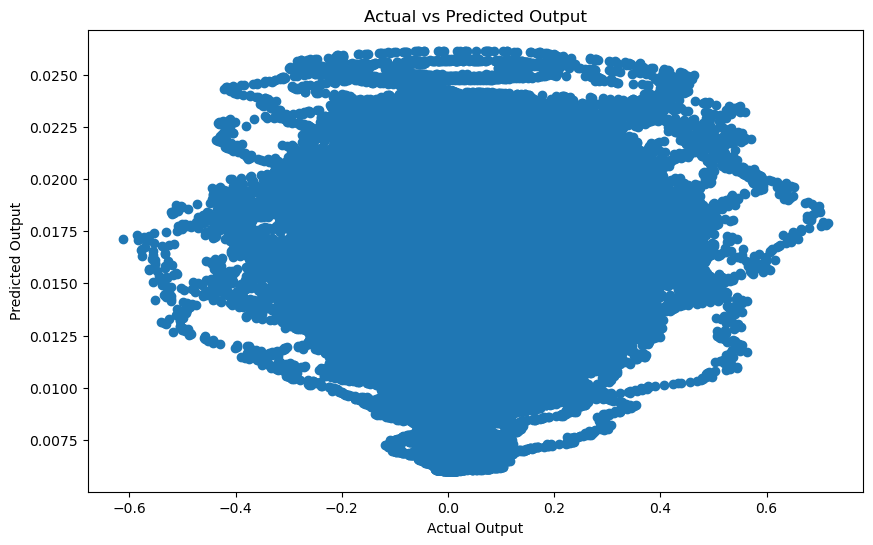

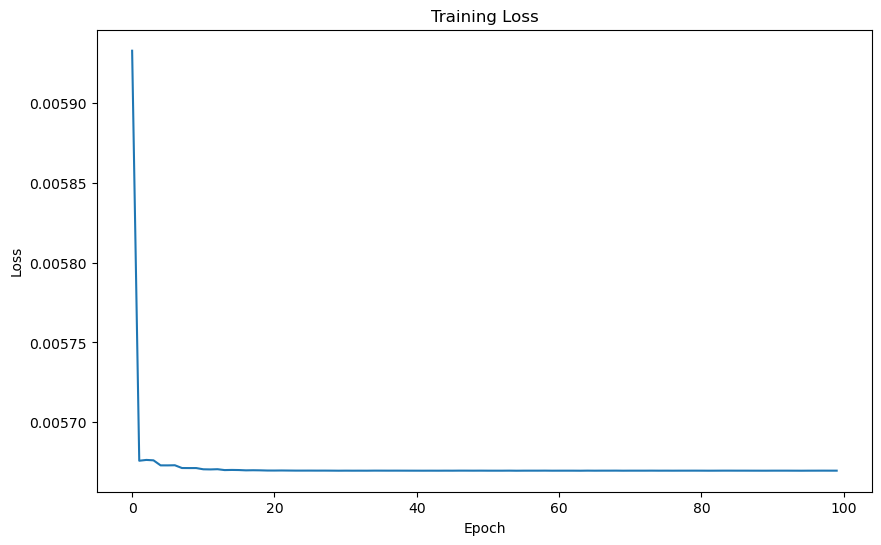

In [161]:
# Plotting the results
sorted_indices = test_input.argsort(axis=0).flatten()

plt.figure(figsize=(10, 6))
plt.scatter(test_output[sorted_indices], predictions1[sorted_indices])
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.title('Actual vs Predicted Output')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

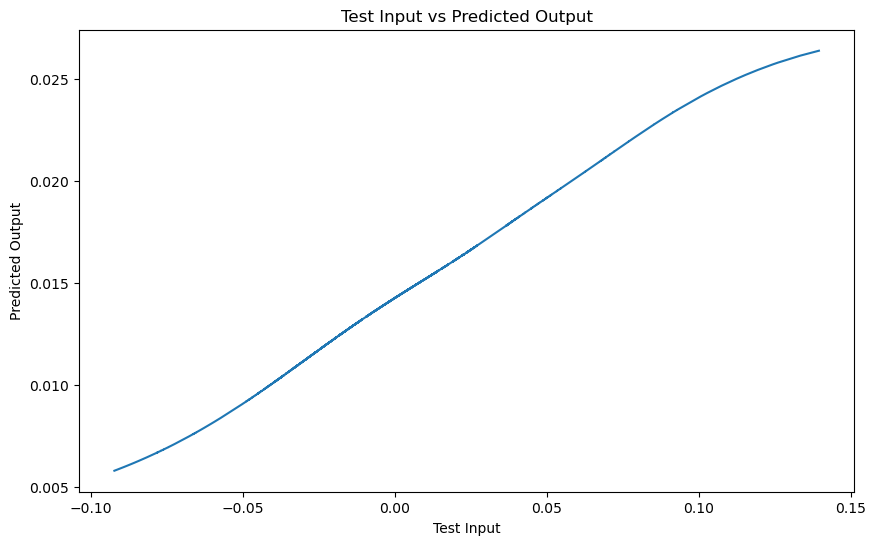

In [193]:
plt.figure(figsize=(10, 6))
plt.plot(test_input[sorted_indices], predictions1[sorted_indices])
plt.xlabel('Test Input')
plt.ylabel('Predicted Output')
plt.title('Test Input vs Predicted Output')
plt.show()

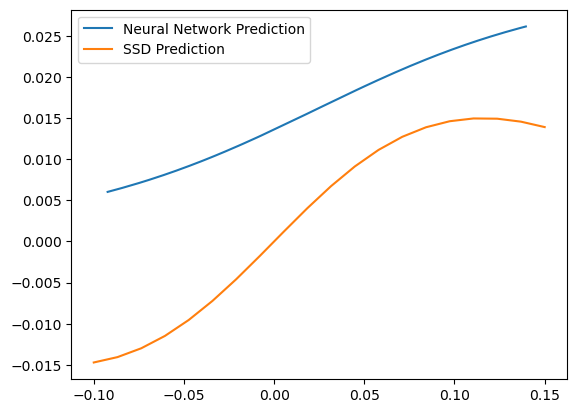

In [194]:
with open("variables.pickle", "rb") as f:
    R_space, U_space = pickle.load(f)
    
plt.plot(test_input[sorted_indices], predictions1[sorted_indices], label='Neural Network Prediction')
plt.plot(U_space, R_space, label='SSD Prediction')
plt.legend()
plt.show()

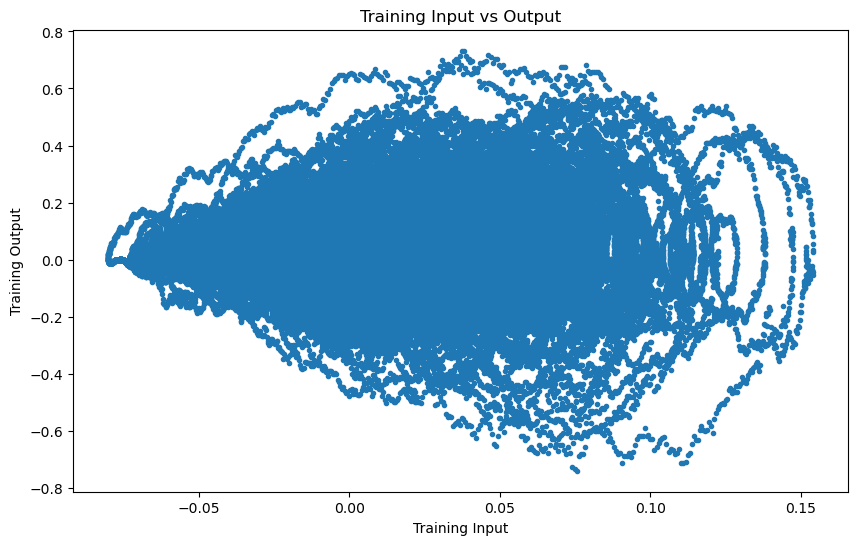

In [140]:
plt.figure(figsize=(10, 6))
plt.plot(train_input[sorted_indices], train_output[sorted_indices],'.')
plt.xlabel('Training Input')
plt.ylabel('Training Output')
plt.title('Training Input vs Output')
plt.show()

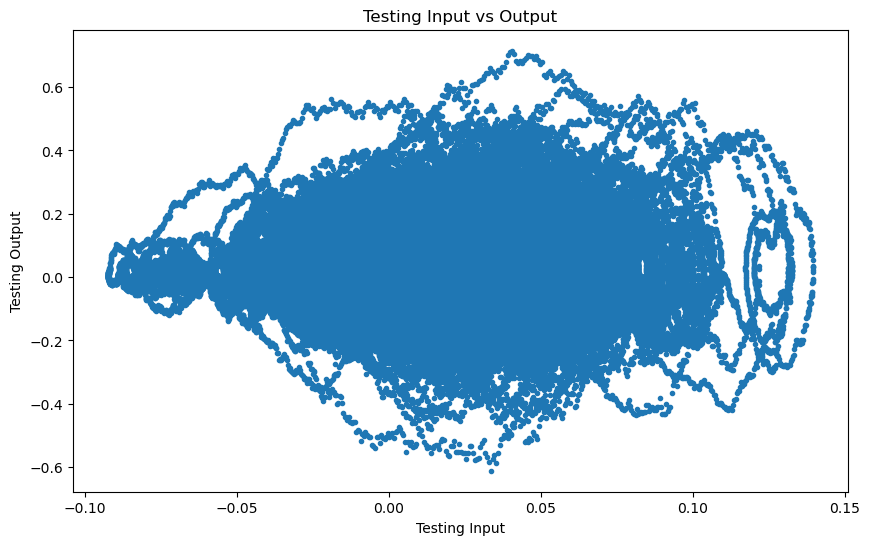

In [141]:
plt.figure(figsize=(10, 6))
plt.plot(test_input[sorted_indices], test_output[sorted_indices],'.')
plt.xlabel('Testing Input')
plt.ylabel('Testing Output')
plt.title('Testing Input vs Output')
plt.show()

In [52]:
# Step 1: Read the CSV file
data_train = pd.read_csv('./sinx_train1.csv')  
data_test = pd.read_csv('./sinx_test1.csv')

# Extract the input and output columns
input_data_train = data_train.iloc[:, 0].values
output_data_train = data_train.iloc[:, 1].values

input_data_test = data_test.iloc[:, 0].values
output_data_test = data_test.iloc[:, 1].values

# Reshape the input and output arrays if necessary
input_data_train = input_data_train.reshape(-1, 1)  # Shape: (num_samples, 1)
output_data_train = output_data_train.reshape(-1, 1)  # Shape: (num_samples, 1)

input_data_test = input_data_test.reshape(-1, 1)  # Shape: (num_samples, 1)
output_data_test = output_data_test.reshape(-1, 1)  # Shape: (num_samples, 1)

train_input = input_data_train
train_output = output_data_train

test_input = input_data_test
test_output = output_data_test


# Create a StandardScaler object
#scaler = StandardScaler()

# Fit the scaler on the training data and transform it
#train_input_scaled = scaler.fit_transform(train_input)

# Transform the test data using the same scaler
#test_input_scaled = scaler.transform(test_input)


# Build the neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='tanh', input_shape=(1,), kernel_initializer='glorot_normal'),
    keras.layers.Dense(64, activation='tanh', kernel_initializer='glorot_normal'),
    keras.layers.Dense(64, activation='tanh', kernel_initializer='glorot_normal'),
    keras.layers.Dense(1)
])

# Create the optimizer
optimizer = keras.optimizers.Adam(learning_rate = 0.01)

# Compile the model
model.compile(optimizer=optimizer, loss='mse')

# Train the model
epochs = 100  # Number of training iterations
batch_size = 32  # Number of samples per gradient update

# Create a learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-6)

# Add the scheduler to the callbacks list
callbacks = [lr_scheduler]

history = model.fit(train_input, train_output, epochs=epochs, batch_size=batch_size, callbacks=callbacks, validation_split=0.1)

# Evaluate the model
loss = model.evaluate(test_input, test_output)
print("Test loss:", loss)

# Make predictions using the trained model
predictions = model.predict(test_input)

Epoch 1/100
29/29 [==============================] - 1s 5ms/step - loss: 0.7352 - val_loss: 0.1386 - lr: 0.0100
Epoch 2/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0981 - val_loss: 0.0693 - lr: 0.0100
Epoch 3/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0735 - val_loss: 0.0684 - lr: 0.0100
Epoch 4/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0612 - val_loss: 0.0690 - lr: 0.0100
Epoch 5/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0603 - val_loss: 0.0433 - lr: 0.0100
Epoch 6/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0486 - val_loss: 0.0311 - lr: 0.0100
Epoch 7/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0287 - val_loss: 0.0180 - lr: 0.0100
Epoch 8/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0157 - val_loss: 0.0074 - lr: 0.0100
Epoch 9/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0063 - val_loss: 0.0022 - lr:

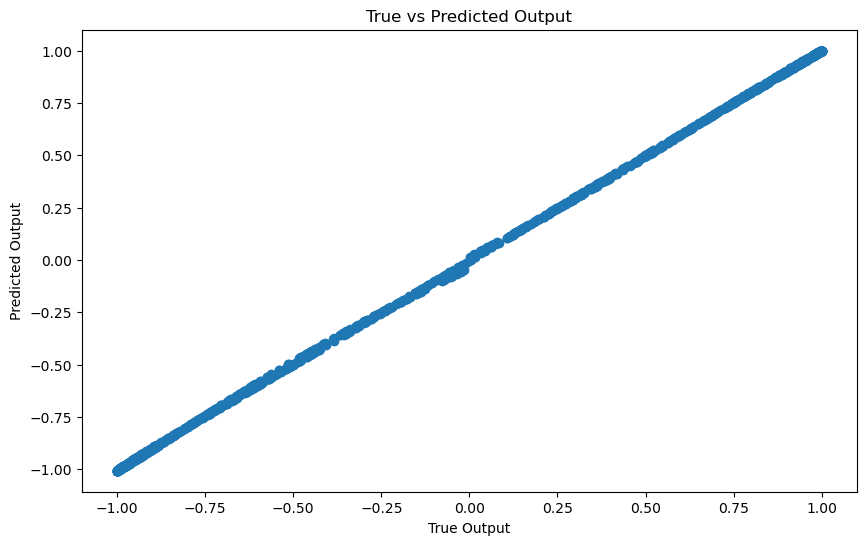

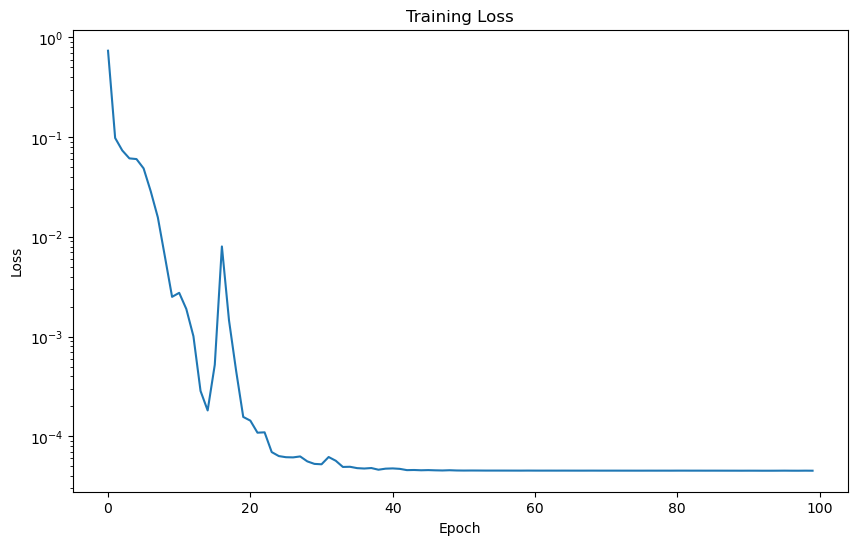

In [53]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(test_output, predictions)
plt.xlabel('True Output')
plt.ylabel('Predicted Output')
plt.title('True vs Predicted Output')
plt.show()

plt.figure(figsize=(10, 6))
plt.semilogy(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

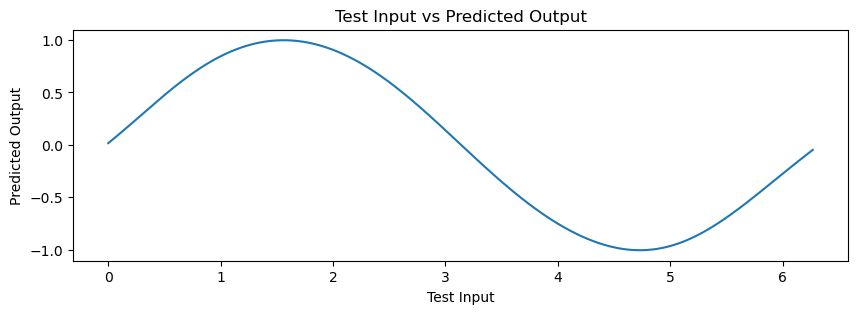

In [54]:
sorted_indices = test_input.argsort(axis=0).flatten()

plt.figure(figsize=(10, 3))
plt.plot(test_input[sorted_indices], predictions[sorted_indices])
plt.xlabel('Test Input')
plt.ylabel('Predicted Output')
plt.title('Test Input vs Predicted Output')
plt.show()

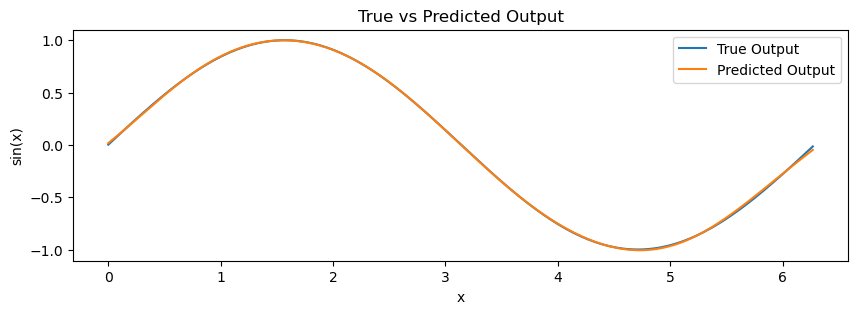

In [55]:
sorted_indices = test_input.argsort(axis=0).flatten()

plt.figure(figsize=(10, 3))
plt.plot(test_input[sorted_indices], test_output[sorted_indices], label='True Output')
plt.plot(test_input[sorted_indices], predictions[sorted_indices], label='Predicted Output')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('True vs Predicted Output')
plt.legend()
plt.show()